# Visualisation of age estimation distribution for all data sets


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

# Set the working directory to the src folder
os.chdir('/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data')


### Loading data

In [2]:
# Opening JSON file
# f = open('age_estimations/output_lfw_complete_all_images_age.json')
f = open('age_estimations/YLFW_output_data_precroped_all_age.json')


# returns JSON object as
# a dictionary
data = json.load(f)

# Convert dictionary to pandas DataFrame
df = pd.DataFrame.from_dict(data, orient='index', columns=['Age'])


# Closing file
f.close()


### Nans 


In [3]:
# count nans
nans = df['Age'].isna().sum()
print(nans)

# remove nans
df = df.dropna()
nans = df['Age'].isna().sum()
print(nans)

581
0


### identities


In [4]:
df.head()

df.describe()
df.value_counts()

# make new column for the identity based on the index
df['Identity'] = df.index
df['Identity'] = df.index.str.rsplit('_', 1).str[0]

df = df.sort_values(by='Age')


In [5]:
df

,Age,Identity
Indian_40_34,0,Indian_40
Caucasian_518_9,0,Caucasian_518
Asian_290_2,0,Asian_290
Caucasian_1221_7,0,Caucasian_1221
Asian_184_33,0,Asian_184
...,...,...
Indian_365_2,9,Indian_365
African_540_5,9,African_540
Asian_490_9,9,Asian_490
Indian_152_11,9,Indian_152


## Plotting the distribution

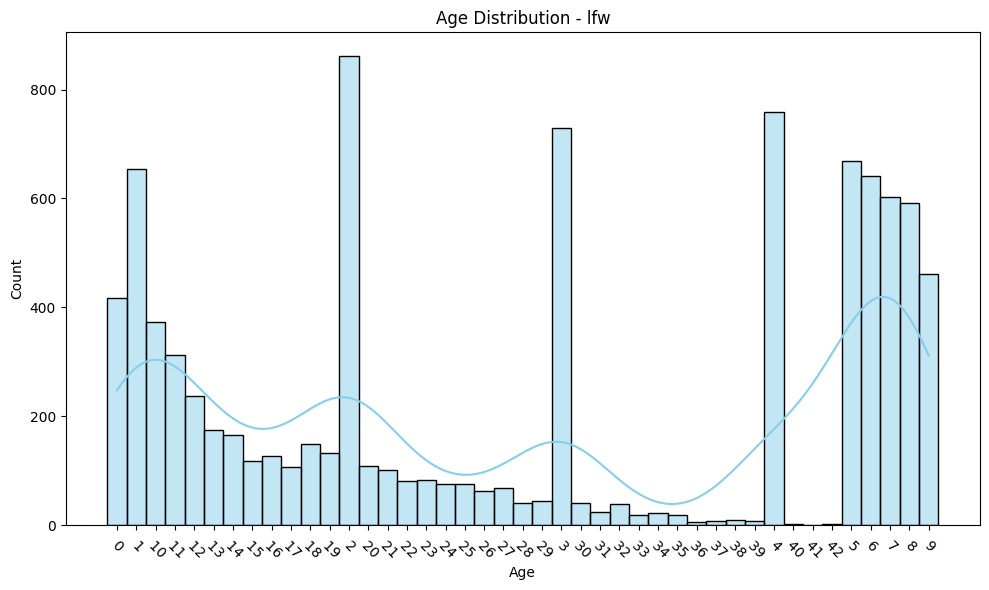

In [6]:

df = df.sort_values(by='Age')

# Now let's create the improved histogram
plt.figure(figsize=(10, 6))  # Larger figure size
sns.histplot(data=df, x="Age", bins=30, color="skyblue", kde=True)  # Smoother curve with KDE
plt.title("Age Distribution - lfw")  # Adding a title
plt.xlabel("Age")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.xticks(rotation=-45)  # Rotate x-axis labels
plt.grid(False)  # Adding grid lines

# Improve the layout and show the plot
plt.tight_layout()
plt.show()


### Childrens ages

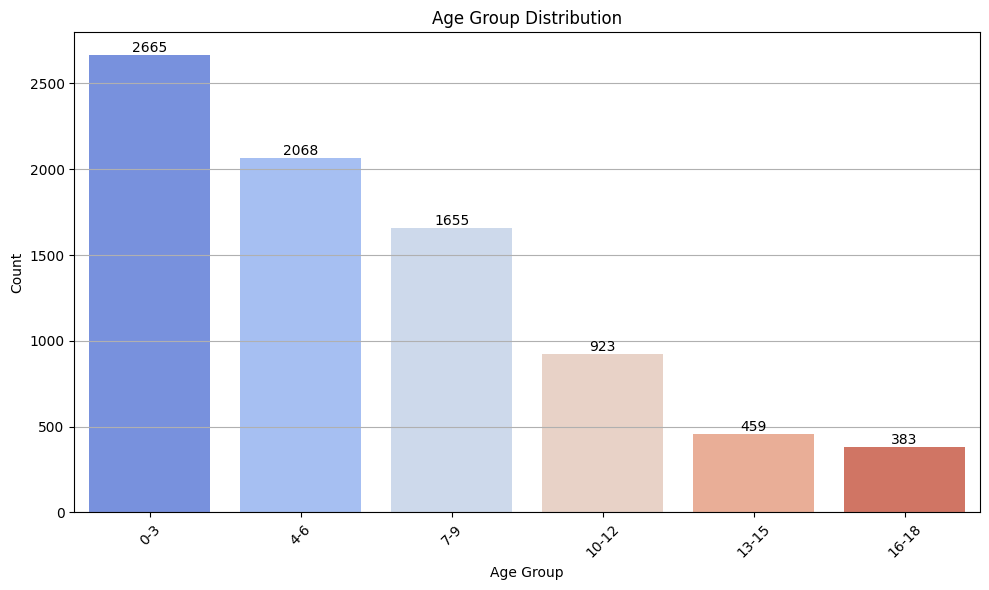

In [7]:

df.Age = df.Age.astype(int)
# Define the age groups and labels
age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']
# Update the DataFrame with age groupings
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)



# Create the bar plot for the age groups
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add value counts to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.tight_layout()
plt.show()
